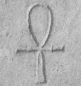

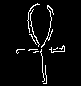

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

#canny edge detection

img = cv.imread('p1.png',0)
edges = cv.Canny(img,200,300)
# plt.subplot(121),plt.imshow(img,cmap = 'gray')
# plt.title('Original Image'), plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(edges,cmap = 'gray')
# plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
# plt.show()

kernel = np.ones((5,5),np.uint8)
# edges = cv.dilate(edges,kernel,iterations = 1)
cv2_imshow(img)
cv2_imshow(edges)

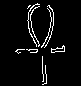

In [2]:
blur = cv.GaussianBlur(img,(5,5),0)
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv.filter2D(src=blur, ddepth=-1, kernel=kernel)
# cv2_imshow(image_sharp)
#canny edge detection

edges = cv.Canny(image_sharp,200,300)
cv2_imshow(edges)

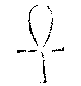

In [ ]:
#binary
im_gray = cv.imread('p1.png', cv.IMREAD_GRAYSCALE)
(thresh, im_bw) = cv.threshold(im_gray, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
thresh = 127
im_bw = cv.threshold(im_gray, thresh, 255, cv.THRESH_BINARY)[1]
cv2_imshow(im_bw)

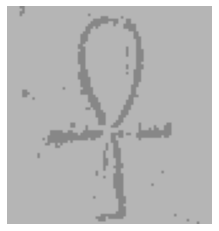

In [ ]:
#Using K-means


sample_image = cv.imread('p1.png')
img = cv.cvtColor(sample_image,cv.COLOR_BGR2RGB)
plt.imshow(img)

twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts=10

ret,label,center=cv.kmeans(twoDimage,K,None,criteria,attempts,cv.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.axis('off')
plt.imshow(result_image)

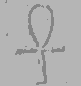

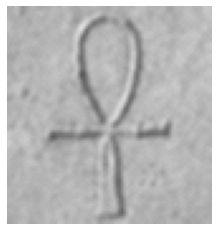

In [3]:
blur = cv.GaussianBlur(img,(5,5),0)
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv.filter2D(src=blur, ddepth=-1, kernel=kernel)
#Using K-means


sample_image = cv.imread('pic1.jpg')
img = cv.cvtColor(image_sharp,cv.COLOR_BGR2RGB)
plt.imshow(img)

twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts=10

ret,label,center=cv.kmeans(twoDimage,K,None,criteria,attempts,cv.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.axis('off')
cv2_imshow(result_image)

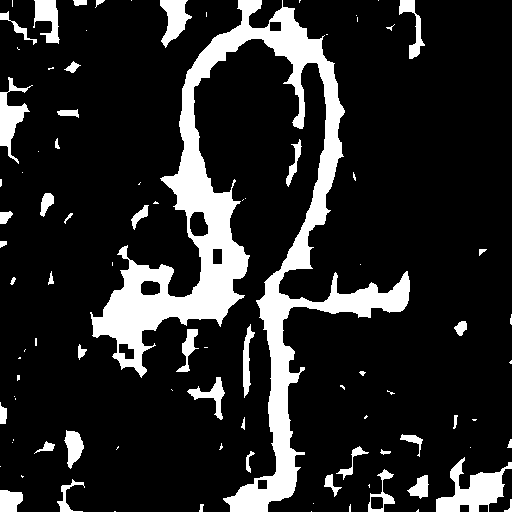

In [ ]:
#using Contour Detection

sample_image = cv.imread('p1.png')
img = cv.cvtColor(sample_image,cv.COLOR_BGR2RGB)
img = cv.resize(img,(512,512))

kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)


# img = cv.fastNlMeansDenoisingColored(img,None,10,10,7,21)


gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
_,thresh = cv.threshold(gray, np.mean(gray), 255, cv.THRESH_BINARY_INV)

kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(thresh,kernel,iterations = 2)
# plt.axis('off')
# plt.imshow(thresh)

cv2_imshow(erosion)

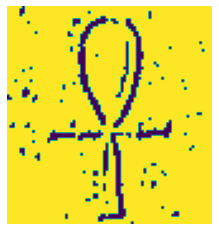

In [ ]:
im_gray = cv.imread("p1.png",  cv.IMREAD_GRAYSCALE)
image = cv.GaussianBlur(im_gray, (5,5), 1)
th =  cv.adaptiveThreshold(image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,3,2)
plt.axis('off')
plt.imshow(image)

plt.imshow(th)

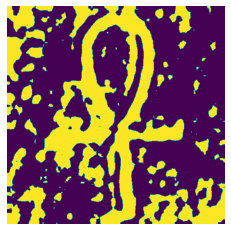

In [4]:
blur = cv.GaussianBlur(img,(5,5),0)
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv.filter2D(src=blur, ddepth=-1, kernel=kernel)
#using Contour Detection

sample_image = cv.imread('pic1.jpg')
img = cv.cvtColor(image_sharp,cv.COLOR_BGR2RGB)
img = cv.resize(img,(512,512))

plt.axis('off');
plt.imshow(img)

gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
_,thresh = cv.threshold(gray, np.mean(gray), 255, cv.THRESH_BINARY_INV)

plt.axis('off')
plt.imshow(thresh)

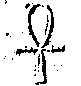

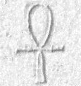

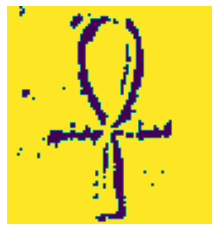

In [ ]:
image = cv.imread('p1.png')
image=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
se=cv.getStructuringElement(cv.MORPH_RECT , (8,8))
bg=cv.morphologyEx(image, cv.MORPH_DILATE, se)
out_gray=cv.divide(image, bg, scale=255)
out_binary=cv.threshold(out_gray, 0, 255, cv.THRESH_OTSU )[1] 


plt.axis('off')
plt.imshow(out_binary)
cv2_imshow( out_binary)

cv2_imshow( out_gray)

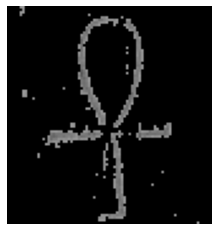

In [ ]:
from skimage.filters import threshold_otsu

#using Otsu Thresholding

sample_image = cv.imread('p1.png')
img = cv.cvtColor(sample_image,cv.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)

img_gray=cv.cvtColor(img,cv.COLOR_RGB2GRAY)

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray < thresh

plt.imshow(img_otsu)

def filter_image(image, mask):

    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask

    return np.dstack([r,g,b])

filtered = filter_image(img, img_otsu)

plt.axis('off')
plt.imshow(filtered)

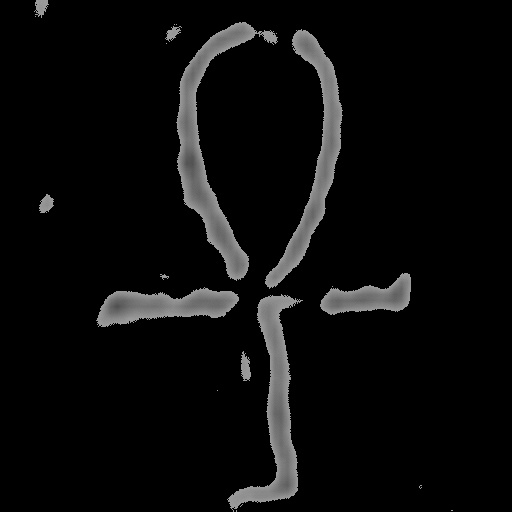

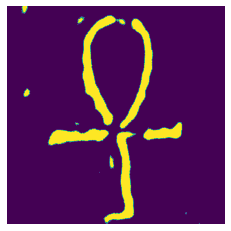

In [5]:
blur = cv.GaussianBlur(img,(5,5),0)
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv.filter2D(src=blur, ddepth=-1, kernel=kernel)
# cv2_imshow(image_sharp)

from skimage.filters import threshold_otsu

#using Otsu Thresholding

sample_image = cv.imread('pic1.jpg')
img = cv.cvtColor(image_sharp,cv.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)

img_gray=cv.cvtColor(img,cv.COLOR_RGB2GRAY)

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray < thresh

plt.imshow(img_otsu)

def filter_image(image, mask):

    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask

    return np.dstack([r,g,b])

filtered = filter_image(img, img_otsu)

# plt.axis('off')
# plt.imshow(filtered)
cv2_imshow(filtered)

# cv2_imshow(edges)
# noiseless_image_colored = cv.fastNlMeansDenoisingColored(img,None,20,20,7,21)
# cv2_imshow(noiseless_image_colored) 

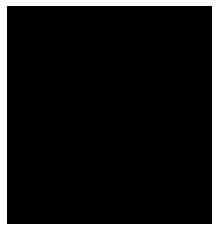

In [ ]:
#using Color Masking

sample_image = cv.imread('p1.png')
img = cv.cvtColor(sample_image,cv.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)


low = np.array([0, 0, 0])
high = np.array([215, 51, 51])

mask = cv.inRange(img, low, high)

plt.axis('off')
plt.imshow(mask)


result = cv.bitwise_and(img, img, mask=mask)

plt.axis('off')
plt.imshow(result)

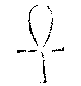

In [ ]:
import cv2 as cv
def draw_bounding_box(click, x, y, flag_param, parameters):
    global x_pt, y_pt, drawing, top_left_point, bottom_right_point, original_image  
    
    if click == cv.EVENT_LBUTTONDOWN:
        drawing = True
        x_pt, y_pt = x, y   

    elif click == cv.EVENT_MOUSEMOVE:
        if drawing:
            top_left_point, bottom_right_point = (x_pt,y_pt), (x,y)
            img[y_pt:y, x_pt:x] = 255 - original_image[y_pt:y, x_pt:x]
            cv.rectangle(img, top_left_point, bottom_right_point, (0,255,0), 2)
    
    elif click == cv.EVENT_LBUTTONUP:
        drawing = False
        top_left_point, bottom_right_point = (x_pt,y_pt), (x,y)
        img[y_pt:y, x_pt:x] = 255 - img[y_pt:y, x_pt:x]
        cv.rectangle(img, top_left_point, bottom_right_point, (0,255,0), 2)
        bounding_box = (x_pt, y_pt, x-x_pt, y-y_pt)
        
        grabcut_algorithm(original_image, bounding_box)



def grabcut_algorithm(original_image, bounding_box):
    
    segment = np.zeros(original_image.shape[:2],np.uint8)
    
    x,y,width,height = bounding_box
    segment[y:y+height, x:x+width] = 1

    background_mdl = np.zeros((1,65), np.float64)
    foreground_mdl = np.zeros((1,65), np.float64)
    
    cv.grabCut(original_image, segment, bounding_box, background_mdl, foreground_mdl, 5,
    cv.GC_INIT_WITH_RECT)

    new_mask = np.where((segment==2)|(segment==0),0,1).astype('uint8')

    original_image = original_image*new_mask[:,:,np.newaxis]

    cv.imshow('Result', original_image)


if __name__=='__main__':
    drawing = False
    top_left_point, bottom_right_point = (-1,-1), (-1,-1)

    original_image = cv.imread("p1.png",0)
    # original_image = cv.resize( original_image ,(500,500))
    image = original_image.copy()
    cv.namedWindow('Frame')
    cv.setMouseCallback('Frame', draw_bounding_box)

    while True:
        cv.imshow('Frame', image)
        c = cv.waitKey(1)
        if c == 27:
            break

    cv.destroyAllWindows()